# 📘 Correlation vs Causation

## 1. Introduction

### What Is Correlation?
Correlation is a statistical measure that expresses the extent to which two variables move together. It is often measured using the **Pearson correlation coefficient (r)**, which ranges from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no linear correlation. Example: as temperature increases, ice cream sales increase → strong positive correlation.

### What Is Causation?
Causation implies that one event is the result of the occurrence of the other event; i.e., **there is a cause-and-effect relationship** between two variables. Example: administering insulin reduces blood sugar → direct causal relationship.

### Why Are Correlation and Causation Often Confused?
1. **Temporal Coincidence**: Two events happening around the same time can seem causally linked.
2. **Human Pattern Recognition**: Our brains are wired to find patterns, even when they’re not meaningful.
3. **Data Dredging**: In large datasets, spurious correlations can arise by chance.
4. **Misuse in Media and Headlines**: Correlation is often reported as causation to sensationalize results.
5. **Lack of Understanding**: Many people are unfamiliar with statistical principles, leading to oversimplified interpretations.


## 2. Theoretical Background


**📊 Pearson Correlation Coefficient**  
- Measures the strength and direction of a **linear association** between two continuous variables.  
- Values range from **-1 to +1**:  
  - **+1** indicates a perfect positive linear relationship.  
  - **0** indicates no linear relationship.  
  - **-1** indicates a perfect negative linear relationship.  
- **Limitations**:  
  - Correlation **does not imply causation**.  
  - It only detects **linear relationships**, so it can miss important **nonlinear** associations.  
  - Correlations can arise due to **confounding variables** or chance.

**Example:** A correlation of 0.9 between children’s shoe size and reading ability likely reflects the influence of a third variable, such as **age**, rather than a direct causal link.

---

**📈 Conditions Required for Causation**  
To infer a **causal relationship** between variables, three key criteria generally need to be satisfied:

1. **Temporal Precedence**: The cause must occur before the effect.  
2. **Covariation**: The cause and effect must be statistically associated (i.e., correlated).  
3. **No Plausible Alternative Explanation**: Other potential confounding factors must be ruled out or accounted for.

Understanding these theoretical foundations is essential to critically evaluate statistical evidence and avoid common pitfalls. Let’s now explore some real-world examples and typical types of fallacies that arise when these principles are overlooked.


In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
    

#### 2.1. Spurious Correlation
- Two variables may appear correlated purely by coincidence or because they are both influenced by a third, hidden variable, known as a confounder. This phenomenon is called spurious correlation.
- Example: Ice cream sales and drowning deaths both increase during warmer months, resulting in a positive correlation. However, neither causes the other directly; instead, the rising temperature drives both.

In [2]:
# Set seed for reproducibility
np.random.seed(1)

# Simulate 12 months of data
dates = pd.date_range(start='2020-01-01', periods=12, freq='ME')  # month-end frequency

# Simulate seasonal temperature trend
temperature = np.linspace(5, 30, 12)

# Generate ice cream sales and drowning incidents based on temperature with noise
ice_cream_sales = 100 + temperature * 10 + np.random.normal(0, 10, 12)
drowning_incidents = 2 + temperature * 0.3 + np.random.normal(0, 0.5, 12)

# Create DataFrame
df = pd.DataFrame({
    'Month': dates,
    'Temperature': temperature,
    'IceCreamSales': ice_cream_sales,
    'DrowningIncidents': drowning_incidents
})

# Calculate correlation matrix
corr_matrix = df[['IceCreamSales', 'DrowningIncidents', 'Temperature']].corr()
print("Correlation Matrix:")
corr_matrix


Correlation Matrix:


,IceCreamSales,DrowningIncidents,Temperature
IceCreamSales,1.000000,0.979973,0.986079
DrowningIncidents,0.979973,1.000000,0.989376
Temperature,0.986079,0.989376,1.000000


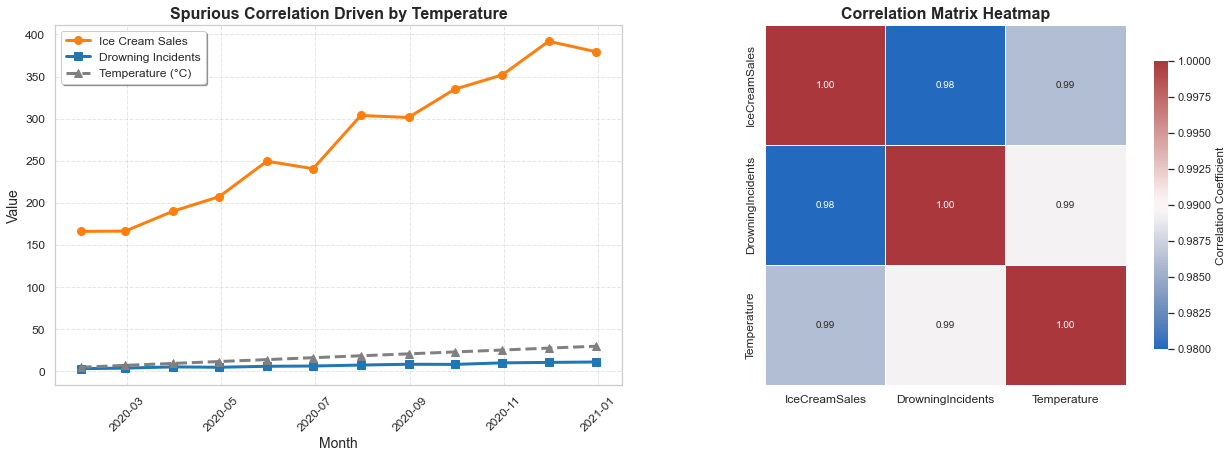

In [3]:
# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create side-by-side visualizations
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# --- Line Chart of Trends ---
axs[0].plot(df['Month'], df['IceCreamSales'], label='Ice Cream Sales', linewidth=3, marker='o', markersize=8, color='#FF7F0E')
axs[0].plot(df['Month'], df['DrowningIncidents'], label='Drowning Incidents', linewidth=3, marker='s', markersize=8, color='#1F77B4')
axs[0].plot(df['Month'], df['Temperature'], label='Temperature (°C)', linestyle='--', linewidth=3, marker='^', markersize=8, color='gray')

axs[0].legend(frameon=True, loc='upper left', facecolor='white', shadow=True, fontsize=12)
axs[0].set_title('Spurious Correlation Driven by Temperature', fontweight='bold', fontsize=16)
axs[0].set_xlabel('Month', fontsize=14)
axs[0].set_ylabel('Value', fontsize=14)
axs[0].tick_params(axis='x', rotation=45, labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].grid(visible=True, linestyle='--', alpha=0.5)

# --- Correlation Heatmap ---
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='vlag',  # Diverging colormap for better contrast
    ax=axs[1],
    fmt='.2f',
    square=True,
    linewidths=0.8,
    linecolor='white',
    cbar_kws={"shrink": 0.8, 'label': 'Correlation Coefficient'}
)
axs[1].set_title('Correlation Matrix Heatmap', fontweight='bold', fontsize=16)
axs[1].tick_params(axis='both', labelsize=12)

# Final layout formatting
plt.tight_layout(pad=3)
plt.show()


#### 2.2. Lurking/Confounding Variables
- A confounding variable is a hidden factor that influences both the independent and dependent variables, creating a misleading association between them.
- In this example, age affects both shoe size and vocabulary size, making it look like shoe size and vocabulary are directly related, when in fact age is driving both.

In [4]:
# Set seed
np.random.seed(42)

# Simulate data for 100 children aged 2 to 12
n = 100
age = np.random.uniform(2, 12, n)

# Shoe size increases with age + some noise
shoe_size = 10 + 1.2 * age + np.random.normal(0, 1, n)

# Vocabulary size increases with age + some noise
vocab_size = 20 + 15 * age + np.random.normal(0, 20, n)

# Assemble into DataFrame
df = pd.DataFrame({
    'Age': age,
    'ShoeSize': shoe_size,
    'VocabSize': vocab_size
})

# Correlation matrix
corr_matrix = df[['ShoeSize', 'VocabSize', 'Age']].corr()
print("Correlation Matrix:")
corr_matrix

Correlation Matrix:


,ShoeSize,VocabSize,Age
ShoeSize,1.000000,0.865562,0.967131
VocabSize,0.865562,1.000000,0.897571
Age,0.967131,0.897571,1.000000


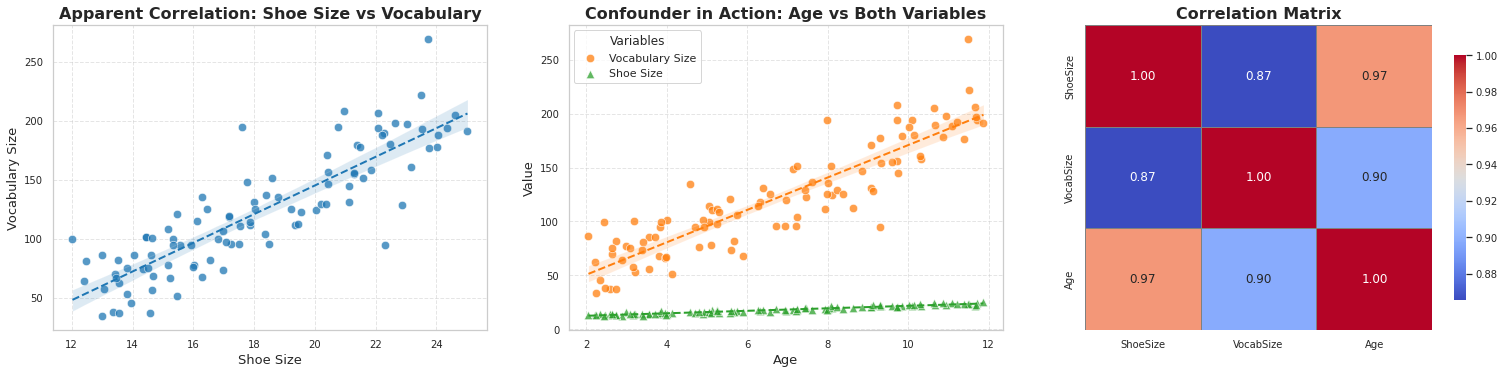

In [5]:
# Set style and parameters
sns.set(style='whitegrid')
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 13,
    'legend.fontsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'font.family': 'DejaVu Sans'
})

fig, axs = plt.subplots(1, 3, figsize=(22, 6))  # 3 plots in one row

# Scatter: Shoe Size vs Vocabulary with regression line
sns.scatterplot(x='ShoeSize', y='VocabSize', data=df, ax=axs[0], s=70, alpha=0.75, color='#1f77b4', edgecolor='w', linewidth=0.7)
sns.regplot(x='ShoeSize', y='VocabSize', data=df, ax=axs[0], scatter=False, color='#1f77b4', line_kws={'linewidth':2, 'linestyle':'--'})
axs[0].set_title('Apparent Correlation: Shoe Size vs Vocabulary', fontweight='bold')
axs[0].set_xlabel('Shoe Size')
axs[0].set_ylabel('Vocabulary Size')
axs[0].grid(True, linestyle='--', alpha=0.5)

# Scatter: Age vs Vocabulary and Shoe Size with regression lines
sns.scatterplot(x='Age', y='VocabSize', data=df, ax=axs[1], s=70, alpha=0.75, color='#ff7f0e', edgecolor='w', linewidth=0.7, label='Vocabulary Size')
sns.scatterplot(x='Age', y='ShoeSize', data=df, ax=axs[1], s=70, alpha=0.75, marker='^', color='#2ca02c', edgecolor='w', linewidth=0.7, label='Shoe Size')
sns.regplot(x='Age', y='VocabSize', data=df, ax=axs[1], scatter=False, color='#ff7f0e', line_kws={'linewidth':2, 'linestyle':'--'})
sns.regplot(x='Age', y='ShoeSize', data=df, ax=axs[1], scatter=False, color='#2ca02c', line_kws={'linewidth':2, 'linestyle':'--'})
axs[1].set_title('Confounder in Action: Age vs Both Variables', fontweight='bold')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Value')
axs[1].legend(title='Variables')
axs[1].grid(True, linestyle='--', alpha=0.5)

# Heatmap for correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='gray', cbar_kws={"shrink": 0.8}, ax=axs[2])
axs[2].set_title('Correlation Matrix', fontweight='bold')

plt.tight_layout(pad=3)
plt.show()


**🔍 Insights:**
- The first scatter plot reveals a strong correlation between shoe size and vocabulary size—but this relationship is misleading and not causal.
- The second plot highlights age as the lurking confounding variable driving both shoe size and vocabulary growth.
- The correlation heatmap confirms significant correlations among all variables, yet the true causal influence originates from age.

#### 2.3. Post Hoc Fallacy (Post hoc ergo propter hoc)
- This logical fallacy occurs when one assumes that because event A happens before event B, event A must have caused event B. It confuses temporal sequence with causation.
- Example: You wash your car, and shortly after, it starts to rain. This does not mean that washing the car caused the rain it’s merely a coincidence in timing.

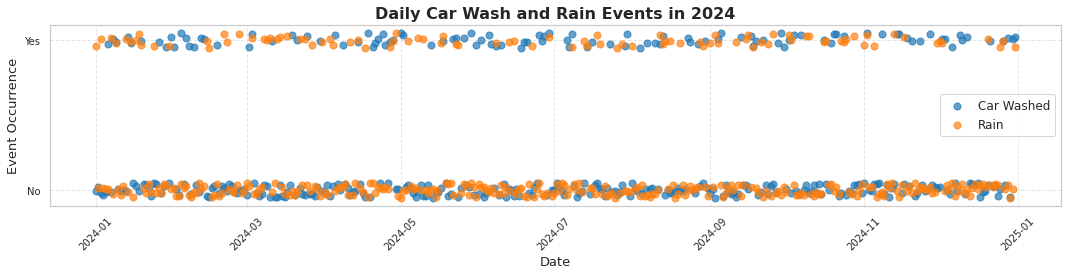

In [6]:
# Seed for reproducibility
np.random.seed(101)

# Simulate all days of 2024 (leap year)
days = pd.date_range('2024-01-01', '2024-12-31')

# Random car washes (0 or 1 per day)
car_washes = np.random.binomial(1, 0.3, len(days))

# Random rain occurrence: 1 if rain, 0 if no rain
rain_chance = np.random.uniform(0, 1, len(days))
rain = (rain_chance > 0.75).astype(int)  # 25% chance of rain each day

# Create DataFrame
df = pd.DataFrame({
    'Date': days,
    'CarWash': car_washes,
    'Rain': rain
})

plt.figure(figsize=(15, 4))

# Add jitter to separate overlapping points
jitter_strength = 0.05
plt.scatter(df['Date'], df['CarWash'] + np.random.uniform(-jitter_strength, jitter_strength, len(df)),
            label='Car Washed', color='#1f77b4', s=50, alpha=0.7)
plt.scatter(df['Date'], df['Rain'] + np.random.uniform(-jitter_strength, jitter_strength, len(df)),
            label='Rain', color='#ff7f0e', s=50, alpha=0.7)

plt.yticks([0, 1], ['No', 'Yes'])
plt.title('Daily Car Wash and Rain Events in 2024', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Event Occurrence')
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**🚗🌧️ Top 3 Insights:**

- No consistent pattern emerges car washes and rain happen independently, showing no causal link.
- Adding jitter reveals overlapping days, making it easier to spot coincidences.
- This visualization reinforces the classic caution: correlation does not imply causation.

#### 2.4. Ecological Fallacy
- Making inferences about individuals based on aggregated group data.
- Example: A country with higher literacy rates also has higher crime rates → this does not imply that literate individuals are more likely to commit crimes.

In [7]:
import warnings
warnings.filterwarnings('ignore')

np.random.seed(123)
n = 500

# Simulate two regions
income_X = np.random.normal(70000, 10000, n)
health_X = np.random.normal(70, 10, n) + 0.0003 * income_X

income_Y = np.random.normal(30000, 5000, n)
health_Y = np.random.normal(60, 12, n) + 0.0004 * income_Y

df_X = pd.DataFrame({'Region': 'X', 'Income': income_X, 'Health': health_X})
df_Y = pd.DataFrame({'Region': 'Y', 'Income': income_Y, 'Health': health_Y})
df = pd.concat([df_X, df_Y])

# Group level averages
group_stats = df.groupby('Region').agg({'Income': 'mean', 'Health': 'mean'}).reset_index()

# Individual correlations by region, selecting relevant columns to avoid warning
indiv_corrs = df[['Region', 'Income', 'Health']].groupby('Region').apply(lambda x: x['Income'].corr(x['Health']))

# Group level correlation (between means)
group_corr = group_stats['Income'].corr(group_stats['Health'])

# Prepare summary table
summary = pd.DataFrame({
    'Region': list(indiv_corrs.index) + ['Group-level'],
    'Average Income': [df[df['Region'] == r]['Income'].mean() for r in indiv_corrs.index] + [group_stats['Income'].mean()],
    'Average Health': [df[df['Region'] == r]['Health'].mean() for r in indiv_corrs.index] + [group_stats['Health'].mean()],
    'Correlation (Income vs Health)': list(indiv_corrs.values) + [group_corr]
})

print("Summary Table:")
summary.round(3)


Summary Table:


,Region,Average Income,Average Health,Correlation (Income vs Health)
0,X,69613.560,90.479,0.297
1,Y,30298.070,71.605,0.246
2,Group-level,49955.815,81.042,1.000


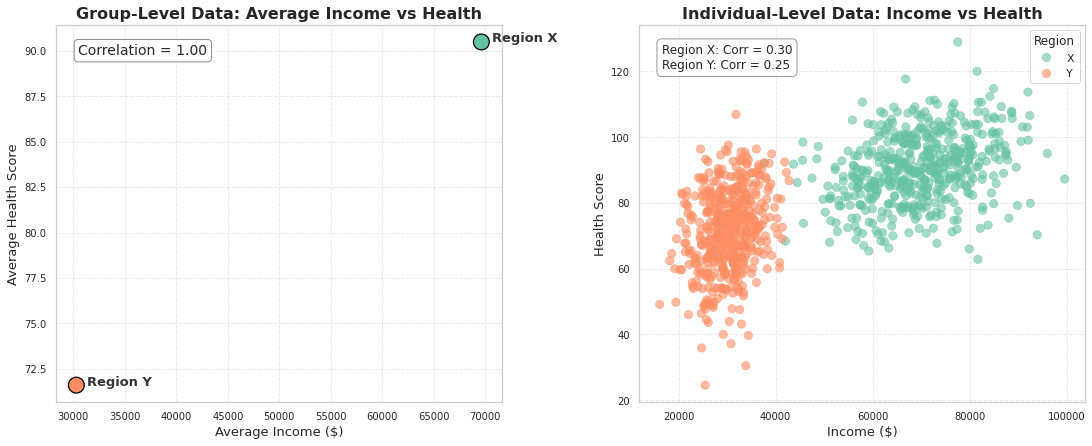

In [8]:
# Set seaborn style and parameters
sns.set(style='whitegrid')
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 13,
    'legend.fontsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'font.family': 'DejaVu Sans'
})

fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# --- Group-level scatterplot ---
palette = sns.color_palette("Set2", n_colors=group_stats['Region'].nunique())
sns.scatterplot(
    data=group_stats, x='Income', y='Health', hue='Region', 
    s=250, legend=False, ax=axs[0], palette=palette, edgecolor='black'
)
for i, row in group_stats.iterrows():
    axs[0].text(
        row['Income'] + 1000, row['Health'], f"Region {row['Region']}", 
        fontsize=13, weight='bold', color='black', alpha=0.8
    )
axs[0].set_title('Group-Level Data: Average Income vs Health', weight='bold')
axs[0].set_xlabel('Average Income ($)')
axs[0].set_ylabel('Average Health Score')
axs[0].grid(True, linestyle='--', alpha=0.4)
axs[0].text(
    0.05, 0.95, f"Correlation = {group_corr:.2f}", transform=axs[0].transAxes,
    fontsize=14, verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9)
)

# --- Individual-level scatterplot ---
sns.scatterplot(
    data=df, x='Income', y='Health', hue='Region', palette=palette,
    alpha=0.6, edgecolor=None, ax=axs[1], s=70
)
axs[1].set_title('Individual-Level Data: Income vs Health', weight='bold')
axs[1].set_xlabel('Income ($)')
axs[1].set_ylabel('Health Score')
axs[1].grid(True, linestyle='--', alpha=0.4)

# Format legend better
handles, labels = axs[1].get_legend_handles_labels()
axs[1].legend(handles=handles, labels=labels, title='Region', loc='upper right')

# Annotate individual correlations nicely
textstr = '\n'.join([f"Region {region}: Corr = {corr:.2f}" for region, corr in indiv_corrs.items()])
axs[1].text(
    0.05, 0.95, textstr, transform=axs[1].transAxes,
    fontsize=12, verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray", alpha=0.8)
)

plt.tight_layout(pad=3)
plt.show()


## 3. Statistical tools and techniques (top 3)

### 3.1. Scatter Plot
- Essential for visualizing relationships between variables and spotting patterns, clusters, or outliers.
- Helps reveal nonlinear relationships and contextualizes correlation coefficients.
- Enhances understanding through clear, intuitive graphics.

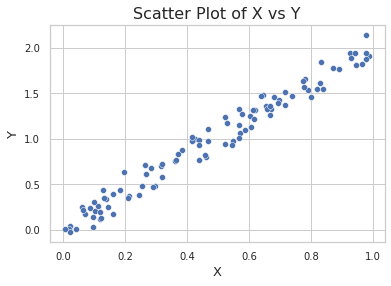

In [9]:
# Simulate data
np.random.seed(0)
x = np.random.rand(100)
y = 2 * x + np.random.normal(0, 0.1, 100)

# Scatter plot
sns.scatterplot(x=x, y=y)
plt.title('Scatter Plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


### 3.2. Correlation Coefficient
- Measures the strength and direction of a linear relationship between two continuous variables.
- Simple and widely used, but limited to detecting only linear associations.
- Does not imply causation, only association.

In [10]:
# Calculate Pearson correlation coefficient and p-value
corr, p_value = pearsonr(x, y)
print(f"Pearson correlation: {corr:.2f}, p-value: {p_value:.4f}")

Pearson correlation: 0.99, p-value: 0.0000


### 3.3. Regression Analysis
- Models the predictive relationship between variables and estimates effect sizes.
- Can control for confounding variables using multiple regression.
- Moves beyond correlation to explore potential causality, though still observational.

In [11]:
# 1. Simulate data
np.random.seed(42)
n = 100
age = np.random.randint(5, 15, size=n)  # Ages 5 to 14
shoe_size = age * 0.3 + np.random.normal(0, 0.5, size=n)
vocab = age * 10 + np.random.normal(0, 5, size=n)

# 2. Build DataFrame
df = pd.DataFrame({
    "Age": age,
    "Shoe Size": shoe_size,
    "Vocabulary": vocab
})

# 3. Show correlation matrix
print("\nCorrelation Matrix:\n", df.corr(numeric_only=True))

# 4. Regression without adjusting for Age (Shoe Size -> Vocabulary)
X1 = sm.add_constant(df["Shoe Size"])
model1 = sm.OLS(df["Vocabulary"], X1).fit()
print("\nModel 1: Vocabulary ~ Shoe Size")
print(model1.summary())

print('-----------------------------------------------------------------------------------------------------')

# 5. Regression adjusting for Age (Shoe Size + Age)
X2 = sm.add_constant(df[["Shoe Size", "Age"]])
model2 = sm.OLS(df["Vocabulary"], X2).fit()
print("\nModel 2: Vocabulary ~ Shoe Size + Age")
print(model2.summary())



Correlation Matrix:
                  Age  Shoe Size  Vocabulary
Age         1.000000   0.870608    0.985252
Shoe Size   0.870608   1.000000    0.858897
Vocabulary  0.985252   0.858897    1.000000

Model 1: Vocabulary ~ Shoe Size
                            OLS Regression Results                            
Dep. Variable:             Vocabulary   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     275.6
Date:                Wed, 30 Jul 2025   Prob (F-statistic):           3.09e-30
Time:                        00:39:51   Log-Likelihood:                -412.79
No. Observations:                 100   AIC:                             829.6
Df Residuals:                      98   BIC:                             834.8
Df Model:                           1                                         
Covariance Type:            nonrobust                     

## 4. Outcomes and Key Takeaways

- Strong correlations can be driven by lurking confounders rather than direct causal links, as seen with age influencing both shoe size and vocabulary.
- Regression models adjusting for confounders help isolate the true effect of each variable.
- Spurious correlations may arise due to coincidental trends or hidden variables (e.g., temperature affecting both ice cream sales and drowning rates).
- Post hoc fallacies highlight the importance of not assuming causation based on temporal sequence alone.
- Ecological fallacies warn us to avoid drawing individual-level conclusions from aggregated group data.
- Overall, careful analysis and consideration of study design are essential to distinguish correlation from causation.